In [1]:
from RunParameters import RunParameters
from TDistribution import TDist

In [19]:
WCLIP = 7 # MODIFY THIS FOR CHANGING DIRECTORY
NTOYS = 150

EPOCHS = '200k'
JOB = '_hstat' # '_hstat'

# DATA_FOLDER = '/lustre/cmswork/nlai/NPL_1D/MODEL_SELECTION/'
# OUT_PATH = DATA_FOLDER + f'E{EPOCHS}W{WCLIP}{JOB}'
OUT_PATH = '/lustre/cmswork/nlai/NPL_1D/test_model_10/'
DOF = 10
NFOLDER = 0

rPar = RunParameters(OUT_PATH, NFOLDER, NTOYS, 0)
toys, w_clip, epochs, check_point_t, ref, bkg, sig, latent, layers = rPar.fetch_parameters()
rPar.print_parameters()

OUT_FILE_t = rPar.fetch_file()
OUT_FILE_t_history = rPar.fetch_history()


Folder name: E200000_latent3_layers1_wclip7.0_ntoy150_ref200000_bkg10000_sig0_patience1000
File name: E200000_latent3_layers1_wclip7.0_ntoy150_ref200000_bkg10000_sig0_patience1000_t.txt

Parameters:                                                                      
 Toys:          150                                              
 Latent space:  3                                            
 Layers:        1                                            
 W_clip:        7.0                                            
 Epochs:        200000                                            
 Patience:      1000                                     
 Ref, Bkg, Sig: 200000 10000 0 



In [20]:
BINS = 7
SAVE_FIG = 0

tDist = TDist(DOF, BINS, toys, epochs, check_point_t, OUT_PATH, OUT_FILE_t, OUT_FILE_t_history, SAVE_FIG)
tDist.getT()
tDist.computeMedian()


Toys at disposal/Total toys: 32/150

Median t distribution:  6.259969
Median p-value: 0.5000            Median significance: 0.0000            from t list
Median p-value: 0.7930            Median significance: -0.8168            from chi2 distribution


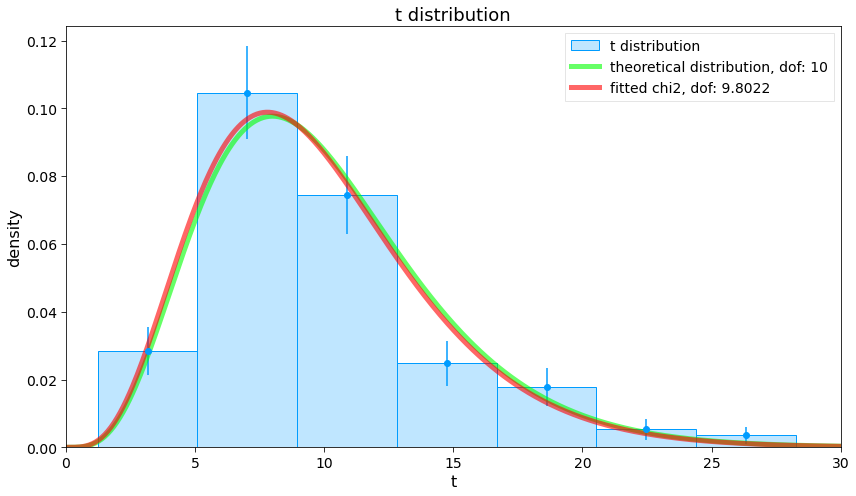

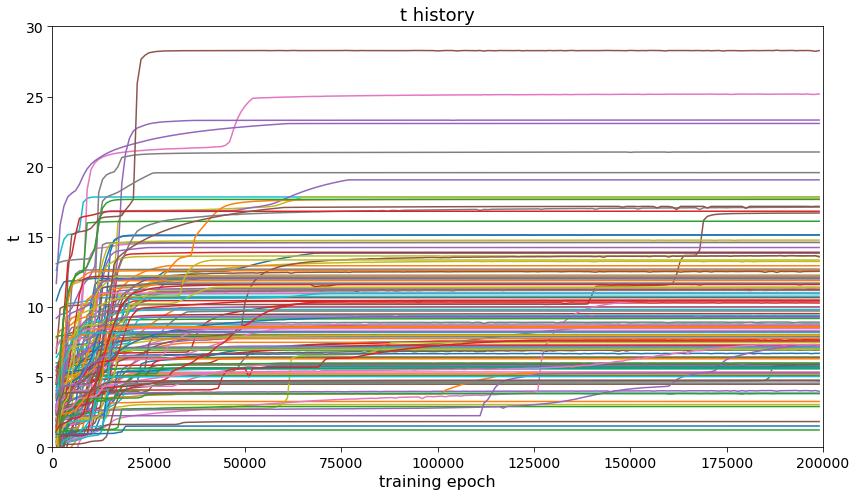

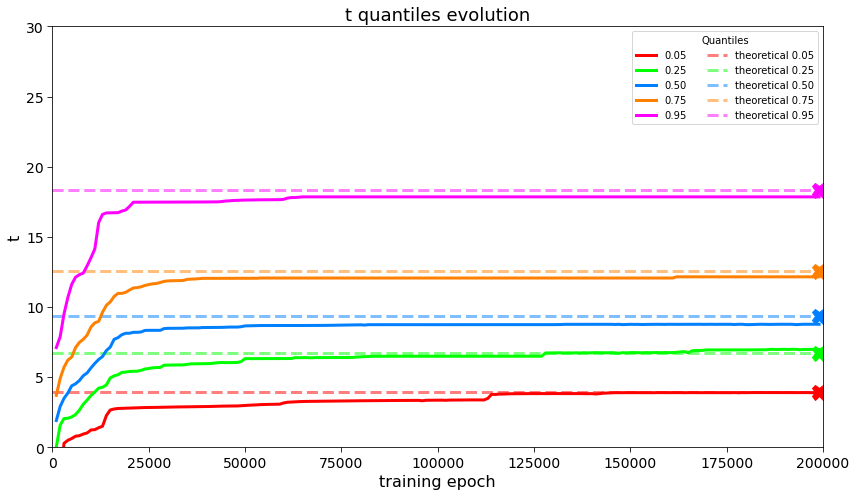

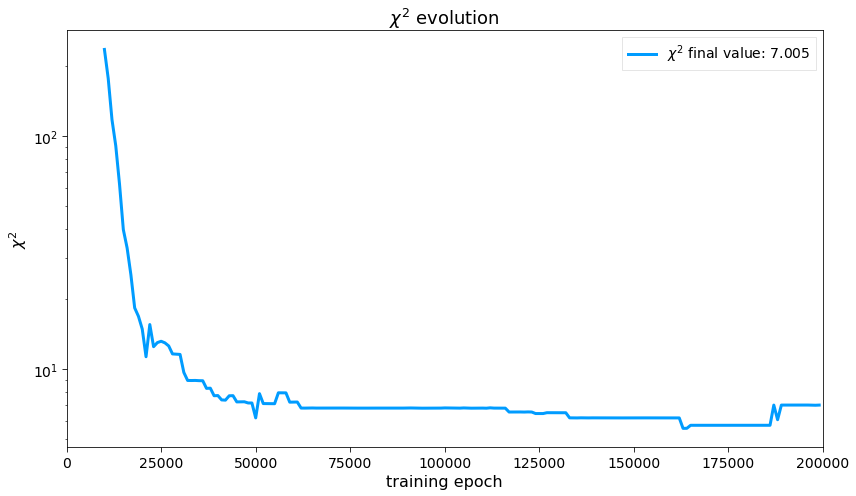

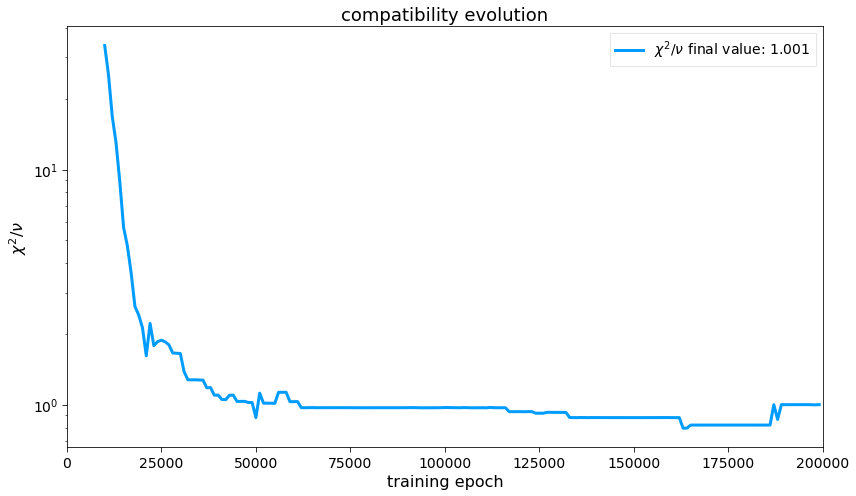

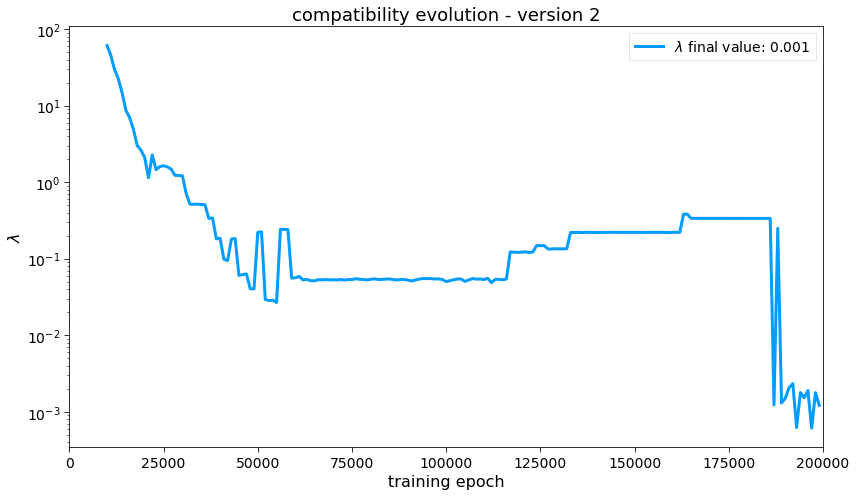

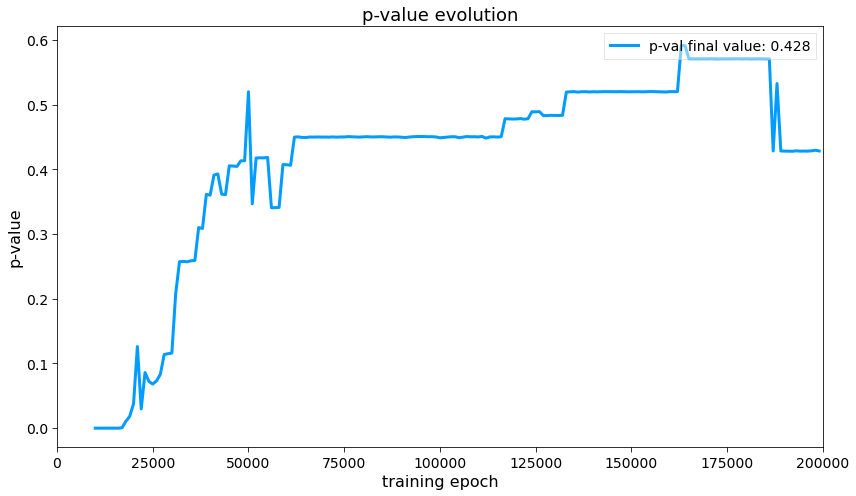

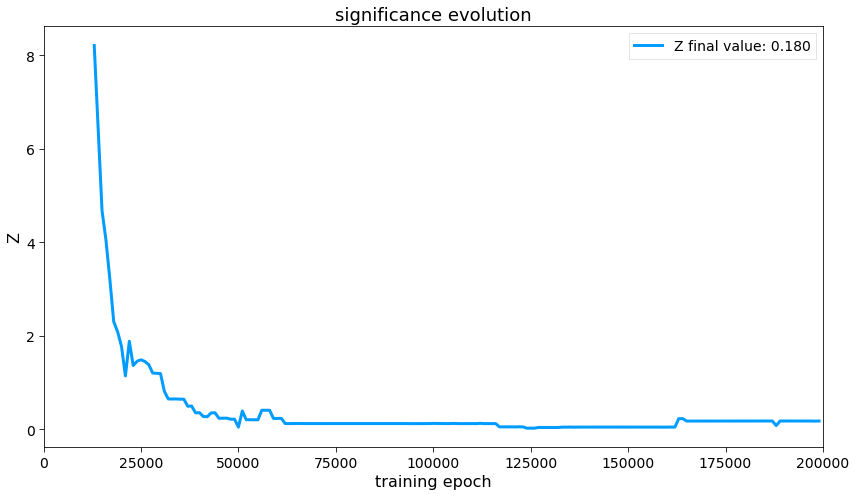

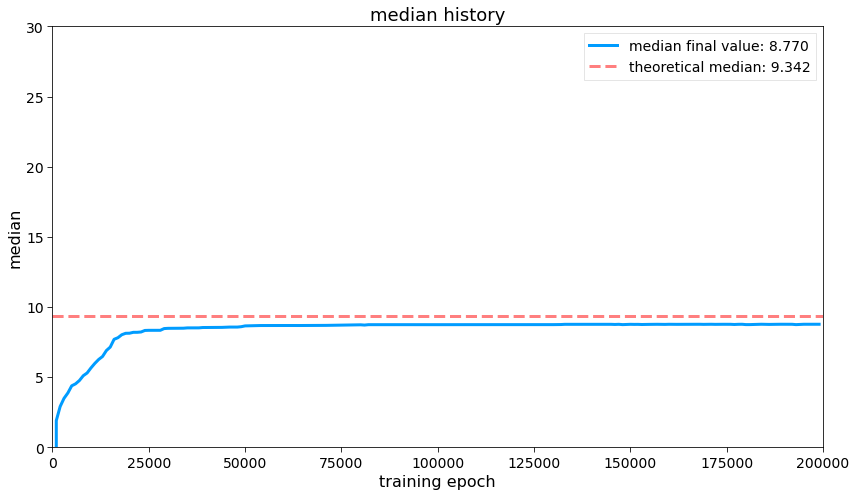

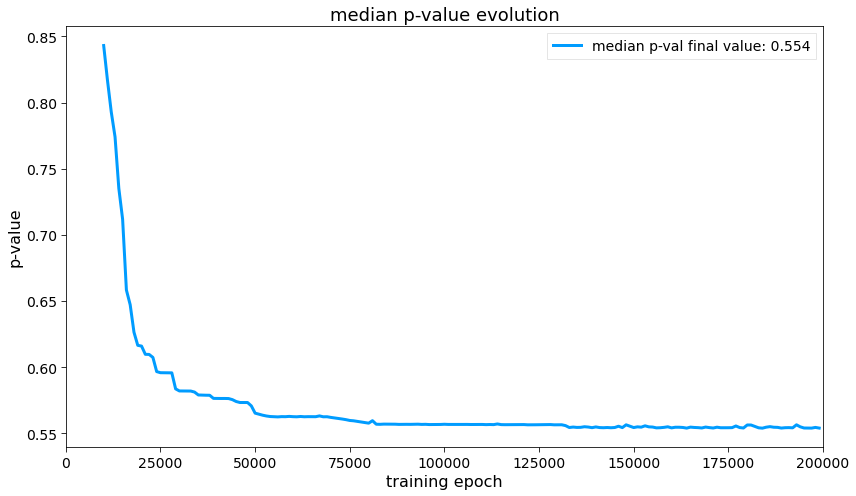

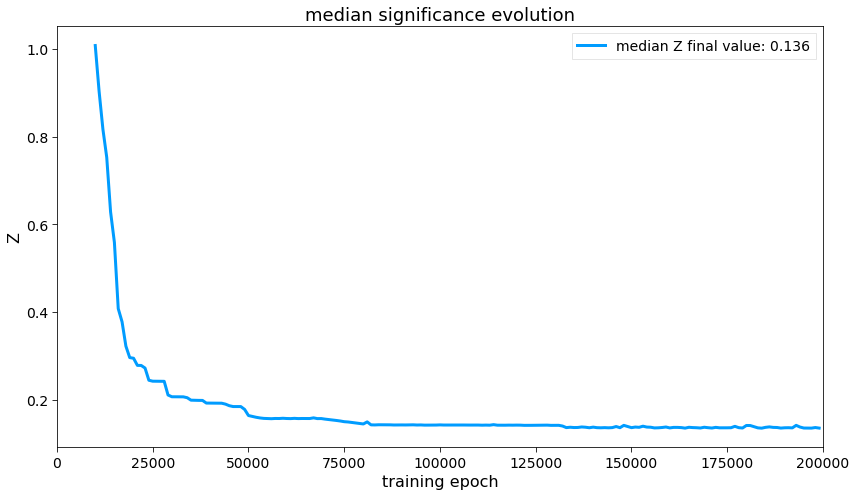

In [17]:
tDist.plotTdist()
tDist.plotThistory()
tDist.plotQuantilesEvo()
tDist.plotChi2History()
tDist.plotChi2Compatibility()
tDist.plotChi2Compatibility2()
tDist.plotPValHistory()
tDist.plotSignificanceHistory()
tDist.plotMedianHistory()
tDist.plotMedianPval()
tDist.plotMedianZ()

# LOAD MODEL

In [26]:
import os
from tensorflow import keras
path = (
            '/lustre/cmswork/nlai/NPL_1D/MODEL_SELECTION/E200kW7_hstat/45/'
            + '1D_patience1000_ref200000_bkg10000_sig0_epochs200000_latent3_layers1_wclip7.0/'
#             + '1D_patience1000_ref200000_bkg10000_sig0_toy150_seed137346_model.json'
        )

model_name = [file for file in os.listdir(path) if file.endswith('model.json')][0]

model_path = path + model_name

weights_name = [file for file in os.listdir(path) if file.endswith('weights.h5')][0]

weights_path = path + weights_name

print(model_path)
print(weights_path)

/lustre/cmswork/nlai/NPL_1D/MODEL_SELECTION/E200kW7_hstat/45/1D_patience1000_ref200000_bkg10000_sig0_epochs200000_latent3_layers1_wclip7.0/1D_patience1000_ref200000_bkg10000_sig0_toy150_seed137346_model.json
/lustre/cmswork/nlai/NPL_1D/MODEL_SELECTION/E200kW7_hstat/45/1D_patience1000_ref200000_bkg10000_sig0_epochs200000_latent3_layers1_wclip7.0/1D_patience1000_ref200000_bkg10000_sig0_toy150_seed137346_weights.h5


In [25]:
with open(model_path, 'r') as json_file:
    json_savedModel= json_file.read()
#load the model architecture 
model_j = keras.models.model_from_json(json_savedModel)
model_j.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_j.load_weights(weights_path)